In [0]:
import numpy as np 
from sklearn import manifold
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

from sklearn import preprocessing
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
import matplotlib.patheffects as PathEffects

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [0]:
# we are going to look at country wise data, hence sum up all the cities of that country into one row
confirmed_cases = confirmed_cases.groupby(['Country/Region'],as_index = False).sum().drop(["Lat","Long"],axis=1)
deaths_cases = deaths_cases.groupby(['Country/Region'],as_index = False).sum().drop(["Lat","Long"],axis=1)

In [11]:
confirmed_cases.head(5)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,Albania,0,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,Algeria,0,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,Andorra,0,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,Angola,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [12]:
confirmed_cases.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,3.016304,3.554348,5.114130,7.793478,11.510870,15.907609,30.315217,33.510870,44.75000,53.951087,...,3913.804348,4252.146739,4660.255435,5068.505435,5507.173913,5956.070652,6507.635870,6913.668478,7310.331522,7750.521739
std,40.397002,47.399330,67.817281,103.642991,152.956974,212.077899,406.104146,448.710928,600.12824,722.567170,...,16206.390411,17737.504073,19629.547028,21529.319428,23706.419395,26027.746886,28718.097175,30771.753279,32903.667463,35157.161835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,11.750000,12.000000,14.750000,15.750000,19.000000,19.750000,20.000000,21.000000,24.000000,25.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,143.000000,159.000000,174.500000,192.500000,225.000000,232.000000,261.500000,267.000000,310.500000,327.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,845.000000,884.500000,1056.750000,1094.000000,1207.500000,1391.750000,1492.250000,1675.000000,1773.250000,1863.000000
max,548.000000,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.00000,9802.000000,...,140909.000000,161837.000000,188172.000000,213372.000000,243616.000000,275586.000000,308850.000000,337072.000000,366667.000000,396223.000000


In [0]:
def get_unique_countries(df):
  locations_master = df['Country/Region'].sort_values().unique()
  return list(locations_master)

In [14]:
print("unique list of confirmed cases: {}\nlength: {} ".format(get_unique_countries(confirmed_cases), len(get_unique_countries(confirmed_cases))))

unique list of confirmed cases: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Icelan

In [0]:
cols = confirmed_cases.keys()
confirmed = confirmed_cases.loc[:, cols[1:-1]]
deaths = deaths_cases.loc[:, cols[1:-1]]
confirmed = confirmed.set_index(confirmed_cases['Country/Region'])
deaths = deaths.set_index(deaths_cases['Country/Region'])

In [0]:
confirmed_cases1 = confirmed_cases.groupby(['Country/Region']).sum()
country_confirmed_cases = confirmed_cases1.sum(axis=1).reset_index(name ='Total_Confirmed_Cases')
country_confirmed_cases_style = country_confirmed_cases.style.background_gradient(cmap='Wistia')

In [0]:
confirmed_cases_array = np.asarray(confirmed, dtype=np.float32)

In [0]:
X = confirmed_cases_array
y = confirmed_cases['Country/Region'].to_list()
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))

In [0]:
def scatter_plot(X_data, y_label, method):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", len(y)))
    fig = plt.figure(figsize=(20,30))
    ax = fig.add_subplot(2, 1, 2)
    ax.set_title(str(method) + ' dimensionality reduction of country-wise cases ', fontsize=20)

    txts = []
    for i in range(len(y)):
        # Position of each label.
        xtext, ytext = np.median(X_data[y_label == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=8)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    # ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y,cmap=plt.cm.get_cmap("jet", len(y)), s=100, label=(le.inverse_transform(y)))
    ax.scatter(X_data[:,0],X_data[:,1],c=palette[y_label.astype(np.int)], s=200)
    sns.palplot(np.array(sns.color_palette("hls", len(y_label))))

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Antigua and Barbuda', 6: 'Argentina', 7: 'Armenia', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahamas', 12: 'Bahrain', 13: 'Bangladesh', 14: 'Barbados', 15: 'Belarus', 16: 'Belgium', 17: 'Belize', 18: 'Benin', 19: 'Bhutan', 20: 'Bolivia', 21: 'Bosnia and Herzegovina', 22: 'Botswana', 23: 'Brazil', 24: 'Brunei', 25: 'Bulgaria', 26: 'Burkina Faso', 27: 'Burma', 28: 'Burundi', 29: 'Cabo Verde', 30: 'Cambodia', 31: 'Cameroon', 32: 'Canada', 33: 'Central African Republic', 34: 'Chad', 35: 'Chile', 36: 'China', 37: 'Colombia', 38: 'Congo (Brazzaville)', 39: 'Congo (Kinshasa)', 40: 'Costa Rica', 41: "Cote d'Ivoire", 42: 'Croatia', 43: 'Cuba', 44: 'Cyprus', 45: 'Czechia', 46: 'Denmark', 47: 'Diamond Princess', 48: 'Djibouti', 49: 'Dominica', 50: 'Dominican Republic', 51: 'Ecuador', 52: 'Egypt', 53: 'El Salvador', 54: 'Equatorial Guinea', 55: 'Eritrea', 56: 'Estonia', 57: 'Eswatini', 58: 'Ethiopia', 59: 'Fi

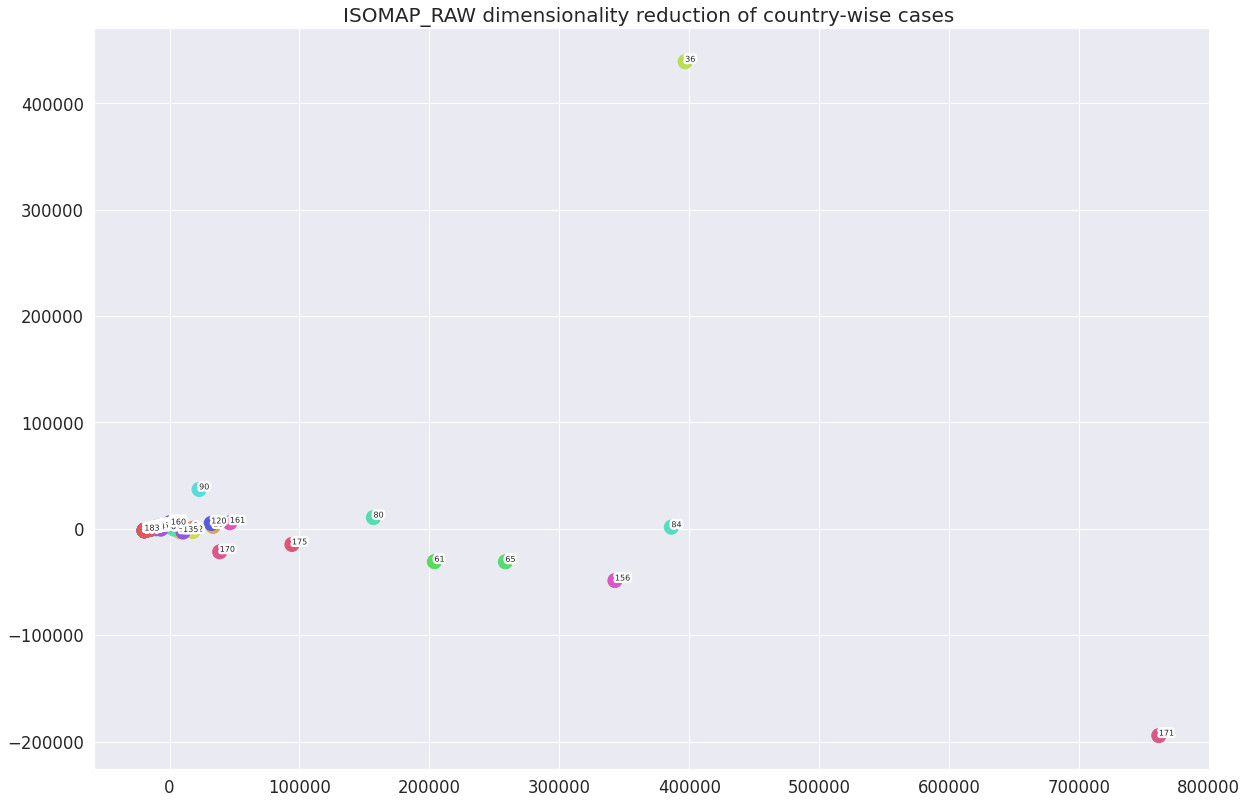

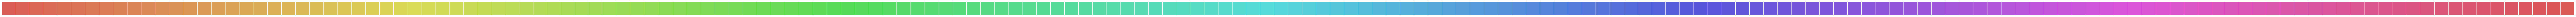

In [20]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
### We are fitting the data to Isomap by getting distance along the manifold 
iso.fit(X)
### We will transform the data
manifold_data = iso.transform(X)
scatter_plot(manifold_data, y, 'ISOMAP_RAW')
print(le_name_mapping)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Antigua and Barbuda', 6: 'Argentina', 7: 'Armenia', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahamas', 12: 'Bahrain', 13: 'Bangladesh', 14: 'Barbados', 15: 'Belarus', 16: 'Belgium', 17: 'Belize', 18: 'Benin', 19: 'Bhutan', 20: 'Bolivia', 21: 'Bosnia and Herzegovina', 22: 'Botswana', 23: 'Brazil', 24: 'Brunei', 25: 'Bulgaria', 26: 'Burkina Faso', 27: 'Burma', 28: 'Burundi', 29: 'Cabo Verde', 30: 'Cambodia', 31: 'Cameroon', 32: 'Canada', 33: 'Central African Republic', 34: 'Chad', 35: 'Chile', 36: 'China', 37: 'Colombia', 38: 'Congo (Brazzaville)', 39: 'Congo (Kinshasa)', 40: 'Costa Rica', 41: "Cote d'Ivoire", 42: 'Croatia', 43: 'Cuba', 44: 'Cyprus', 45: 'Czechia', 46: 'Denmark', 47: 'Diamond Princess', 48: 'Djibouti', 49: 'Dominica', 50: 'Dominican Republic', 51: 'Ecuador', 52: 'Egypt', 53: 'El Salvador', 54: 'Equatorial Guinea', 55: 'Eritrea', 56: 'Estonia', 57: 'Eswatini', 58: 'Ethiopia', 59: 'Fi

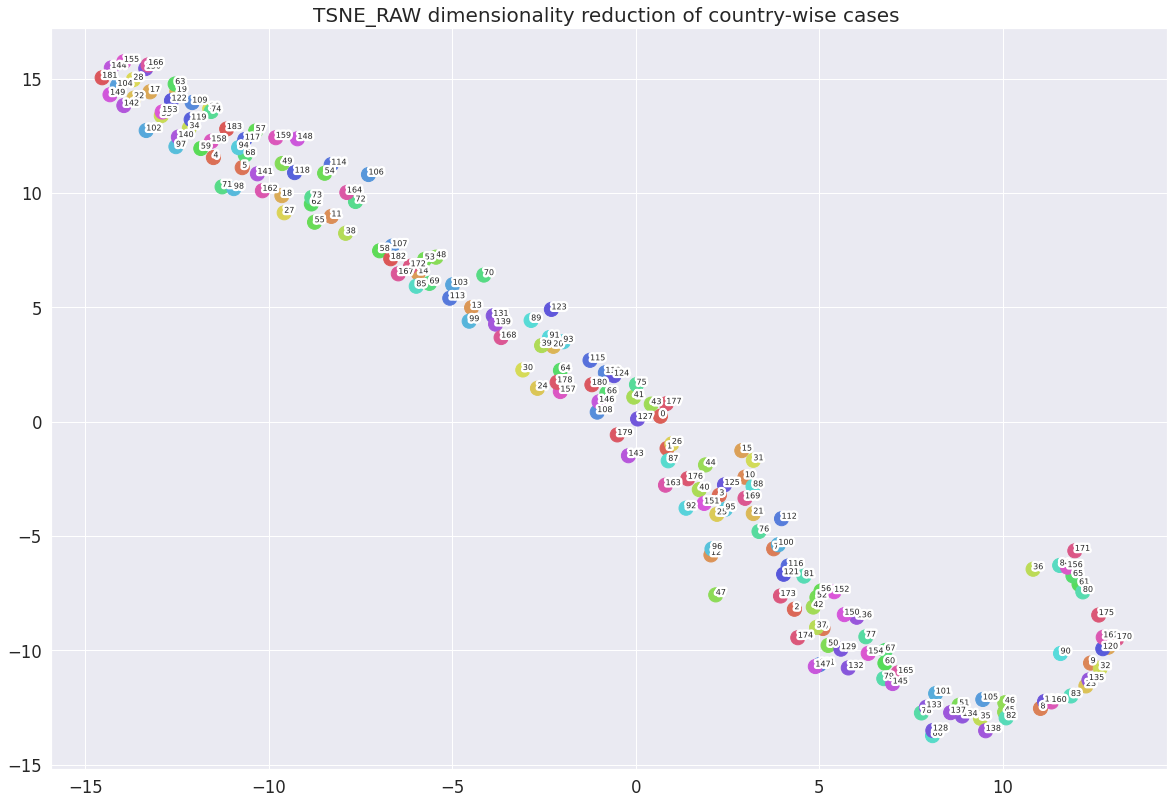

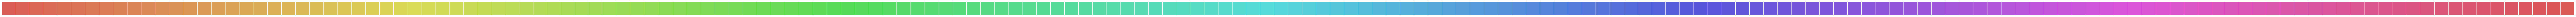

In [21]:
tsne = manifold.TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X,y)
scatter_plot(tsne_data, y, 'TSNE_RAW')
print(le_name_mapping)

In [0]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
# scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Antigua and Barbuda', 6: 'Argentina', 7: 'Armenia', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahamas', 12: 'Bahrain', 13: 'Bangladesh', 14: 'Barbados', 15: 'Belarus', 16: 'Belgium', 17: 'Belize', 18: 'Benin', 19: 'Bhutan', 20: 'Bolivia', 21: 'Bosnia and Herzegovina', 22: 'Botswana', 23: 'Brazil', 24: 'Brunei', 25: 'Bulgaria', 26: 'Burkina Faso', 27: 'Burma', 28: 'Burundi', 29: 'Cabo Verde', 30: 'Cambodia', 31: 'Cameroon', 32: 'Canada', 33: 'Central African Republic', 34: 'Chad', 35: 'Chile', 36: 'China', 37: 'Colombia', 38: 'Congo (Brazzaville)', 39: 'Congo (Kinshasa)', 40: 'Costa Rica', 41: "Cote d'Ivoire", 42: 'Croatia', 43: 'Cuba', 44: 'Cyprus', 45: 'Czechia', 46: 'Denmark', 47: 'Diamond Princess', 48: 'Djibouti', 49: 'Dominica', 50: 'Dominican Republic', 51: 'Ecuador', 52: 'Egypt', 53: 'El Salvador', 54: 'Equatorial Guinea', 55: 'Eritrea', 56: 'Estonia', 57: 'Eswatini', 58: 'Ethiopia', 59: 'Fi

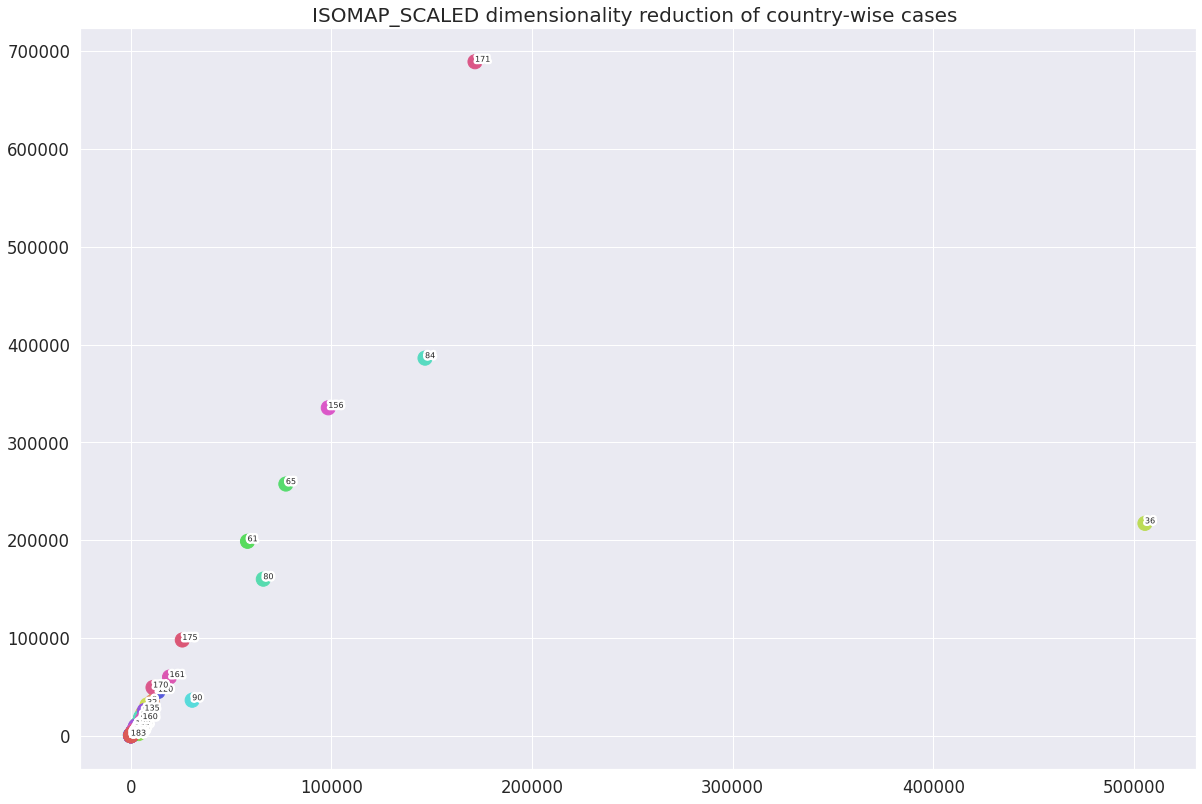

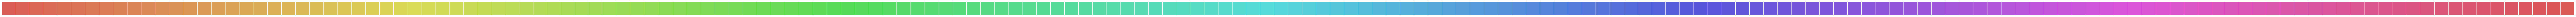

In [23]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
### We are fitting the data to Isomap by getting distance along the manifold 
iso.fit(X_scaled)
### We will transform the data
manifold_data = iso.transform(X)
scatter_plot(manifold_data, y, 'ISOMAP_SCALED')
print(le_name_mapping)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Antigua and Barbuda', 6: 'Argentina', 7: 'Armenia', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahamas', 12: 'Bahrain', 13: 'Bangladesh', 14: 'Barbados', 15: 'Belarus', 16: 'Belgium', 17: 'Belize', 18: 'Benin', 19: 'Bhutan', 20: 'Bolivia', 21: 'Bosnia and Herzegovina', 22: 'Botswana', 23: 'Brazil', 24: 'Brunei', 25: 'Bulgaria', 26: 'Burkina Faso', 27: 'Burma', 28: 'Burundi', 29: 'Cabo Verde', 30: 'Cambodia', 31: 'Cameroon', 32: 'Canada', 33: 'Central African Republic', 34: 'Chad', 35: 'Chile', 36: 'China', 37: 'Colombia', 38: 'Congo (Brazzaville)', 39: 'Congo (Kinshasa)', 40: 'Costa Rica', 41: "Cote d'Ivoire", 42: 'Croatia', 43: 'Cuba', 44: 'Cyprus', 45: 'Czechia', 46: 'Denmark', 47: 'Diamond Princess', 48: 'Djibouti', 49: 'Dominica', 50: 'Dominican Republic', 51: 'Ecuador', 52: 'Egypt', 53: 'El Salvador', 54: 'Equatorial Guinea', 55: 'Eritrea', 56: 'Estonia', 57: 'Eswatini', 58: 'Ethiopia', 59: 'Fi

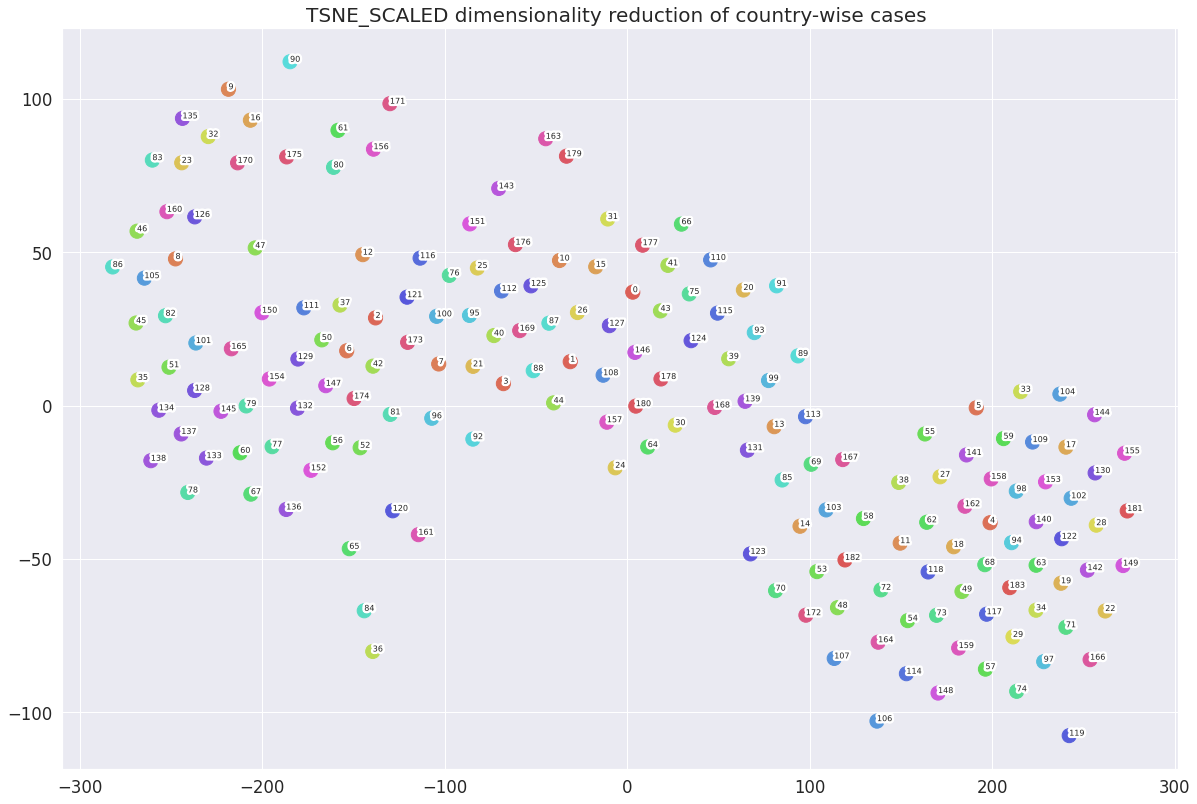

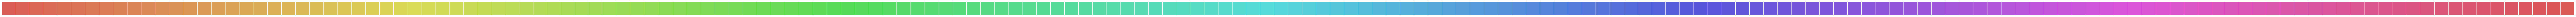

In [24]:
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=45, learning_rate=1200)
tsne_data = tsne.fit_transform(X_scaled,y)
scatter_plot(tsne_data, y, 'TSNE_SCALED')
print(le_name_mapping)

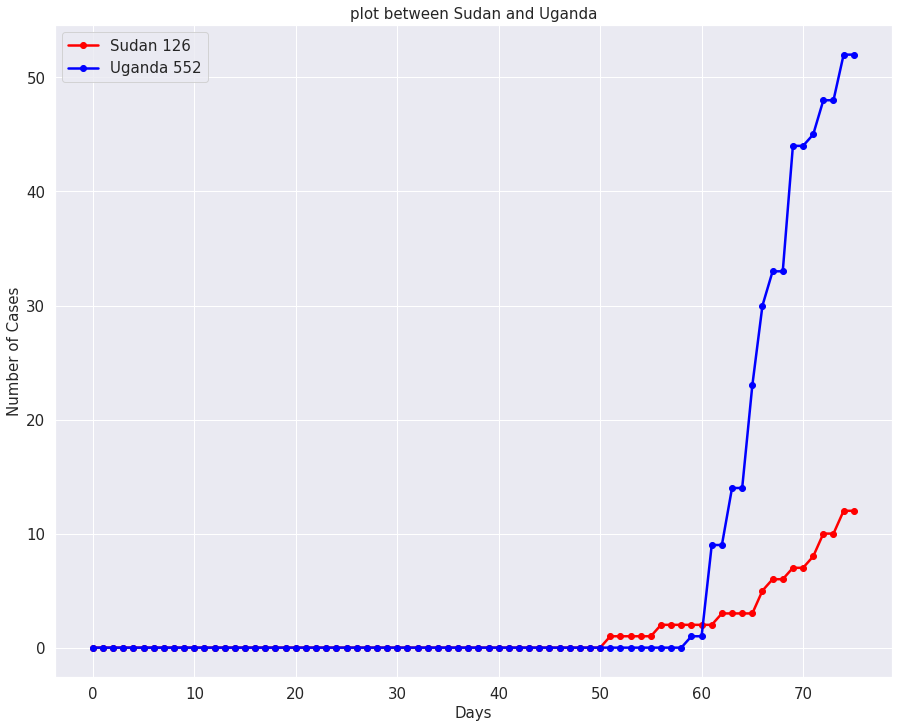

In [25]:
plt.figure(figsize=(15, 12))
data1 = 158
data2 = 172

days = np.array([i for i in range(len(confirmed.keys()))]).reshape(-1, 1)

plt.plot(days, X[data1], 'r-o')
plt.plot(days, X[data2], 'b-o')

plt.title('plot between ' + str(le_name_mapping[data1]) + ' and ' + str(le_name_mapping[data2]), size=15)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)

data1_leg = str(le_name_mapping[data1]) + " "+ str(country_confirmed_cases.loc[country_confirmed_cases['Country/Region'] == le_name_mapping[data1]]['Total_Confirmed_Cases'].values[0])
data2_leg = str(le_name_mapping[data2]) + " "+ str(country_confirmed_cases.loc[country_confirmed_cases['Country/Region'] == le_name_mapping[data2]]['Total_Confirmed_Cases'].values[0])
plt.legend([data1_leg, data2_leg], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

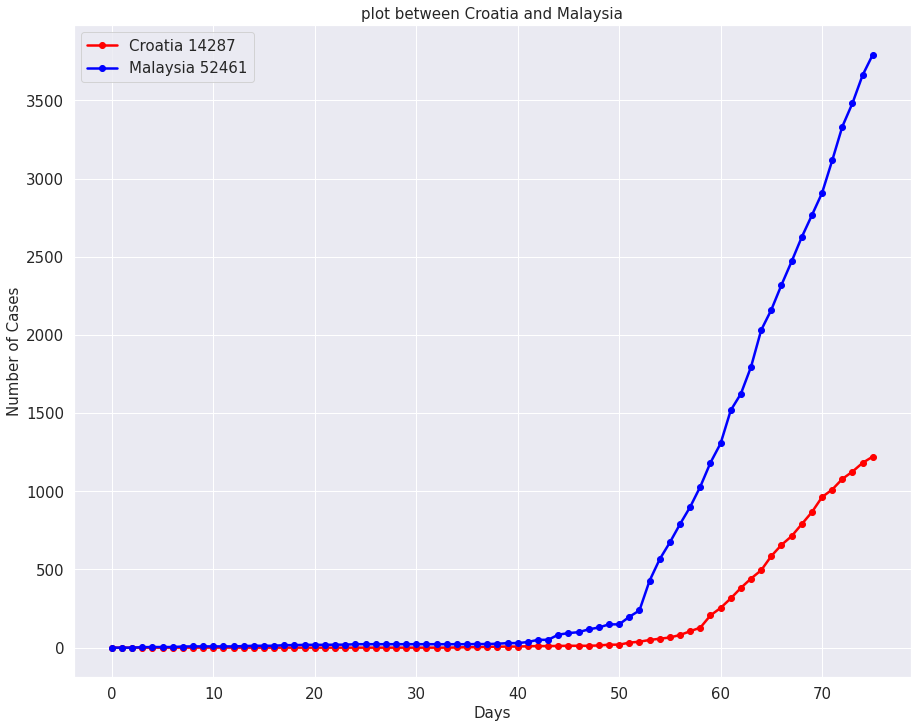

In [26]:
plt.figure(figsize=(15, 12))
data1 = 42
data2 = 105

days = np.array([i for i in range(len(confirmed.keys()))]).reshape(-1, 1)

plt.plot(days, X[data1], 'r-o')
plt.plot(days, X[data2], 'b-o')

plt.title('plot between ' + str(le_name_mapping[data1]) + ' and ' + str(le_name_mapping[data2]), size=15)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)

data1_leg = str(le_name_mapping[data1]) + " "+ str(country_confirmed_cases.loc[country_confirmed_cases['Country/Region'] == le_name_mapping[data1]]['Total_Confirmed_Cases'].values[0])
data2_leg = str(le_name_mapping[data2]) + " "+ str(country_confirmed_cases.loc[country_confirmed_cases['Country/Region'] == le_name_mapping[data2]]['Total_Confirmed_Cases'].values[0])
plt.legend([data1_leg, data2_leg], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()